In [161]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import datetime

In [162]:
pd.set_option('display.max_columns', None)

In [347]:
train_ops = pd.read_csv('/Users/kost/Desktop/решено/data/poezd.csv', sep=';', encoding='utf-8')[['kop','mnem_oper']]

In [197]:
df = pd.read_csv('/Users/kost/Desktop/решено/data/statistics-07-20.csv',sep=';')

In [164]:
cds = pd.read_csv('/Users/kost/Desktop/решено/data/codes.csv',sep=';')

In [165]:
uniq_ops_number = df.operation_car.unique()[~np.isnan(df.operation_car.unique())]
np.sort(uniq_ops_number)

array([ 3.,  4., 10., 11., 13., 14., 16., 18., 19., 20., 21., 23., 26.,
       27., 28., 29., 78., 79., 80., 81.])

### 1. Выбрать код операции

In [166]:
cop = 4
print(cds[cds.index_code == cop].values[0])

[4 'ВКЛП' 'ВКЛЮЧЕНИE ВАГОНА В ПОЕЗД              ']


### 2. Выбрать данные по заданной операции

In [167]:
df[df.operation_car == cop].shape

(0, 21)

In [168]:
tdf = df[df.operation_car == cop]
tdf.shape

(828782, 21)

### 3. Запустить профайлер

In [169]:
dt = datetime.datetime.now().strftime("%m/%d/%y - %H:%M")
profile = ProfileReport(tdf, title=dt, explorative=True)
fname = 'pd-report-'+str(cop)+'.html'
profile.to_file(output_file=fname)

In [173]:
pd.options.display.float_format = '{:,.2f}'.format

In [373]:
df.sort_values(by=['operation_date'])

,index_train,length,car_number,destination_esr,adm,danger,gruz,loaded,operation_car,operation_date,operation_st_esr,operation_st_id,operation_train,receiver,rodvag,rod_train,sender,ssp_station_esr,ssp_station_id,tare_weight,weight_brutto
2851768,NaN,NaN,51230811,"941,600.00",NaN,NaN,NaN,2.00,81.00,2020-07-01 00:00:00,"940,006.00","2,000,037,548.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2847439,NaN,NaN,57510596,"941,600.00",NaN,NaN,NaN,2.00,81.00,2020-07-01 00:00:00,"940,006.00","2,000,037,548.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2843999,NaN,1.00,62694518,"887,603.00",20.00,NaN,"421,034.00",NaN,18.00,2020-07-01 00:00:00,"986,103.00","2,002,025,661.00",NaN,"26,648,903.00",60.00,NaN,"93,315,475.00",NaN,NaN,245.00,NaN
2831679,NaN,NaN,57328866,"941,600.00",NaN,NaN,NaN,2.00,81.00,2020-07-01 00:00:00,"940,006.00","2,000,037,548.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2853078,NaN,NaN,51038883,"941,600.00",NaN,NaN,NaN,2.00,81.00,2020-07-01 00:00:00,"940,006.00","2,000,037,548.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2825914,"920,407,905,921,202.00",0.85,34059071,"921,306.00",NaN,NaN,"231,123.00",2.00,4.00,2020-07-31 23:59:00,"920,407.00","2,000,036,546.00",5.00,"68,594,560.00",90.00,83.00,"68,594,560.00","921,202.00","2,000,036,604.00",NaN,579.00
2830795,NaN,0.87,50075068,"985,505.00",20.00,1.00,"226,021.00",NaN,11.00,2020-07-31 23:59:00,"968,707.00","2,000,038,620.00",NaN,"79,601,286.00",70.00,NaN,"48,134,187.00",NaN,NaN,259.00,NaN
2828366,"920,407,905,921,202.00",1.52,37843307,"921,306.00",NaN,NaN,"693,087.00",1.00,4.00,2020-07-31 23:59:00,"920,407.00","2,000,036,546.00",5.00,"68,594,560.00",90.00,83.00,"68,594,560.00","921,202.00","2,000,036,604.00",NaN,579.00
2831268,NaN,0.87,50479930,"831,504.00",20.00,1.00,"421,034.00",NaN,18.00,2020-07-31 23:59:00,"864,705.00","2,001,933,502.00",NaN,"98,770,511.00",70.00,NaN,"15,199,450.00",NaN,NaN,267.00,NaN


In [193]:
stations = list(set(df.operation_st_id.dropna()))

In [354]:
df.operation_st_id.value_counts()

2,000,038,976.00    207099
2,000,038,600.00    146427
2,000,037,862.00    116936
2,001,933,494.00     96307
2,001,930,816.00     82794
                     ...  
2,000,037,640.00         1
2,000,036,452.00         1
2,000,036,458.00         1
2,000,035,312.00         1
2,000,036,334.00         1
Name: operation_st_id, Length: 744, dtype: int64

In [287]:
stations

[2000037892.0,
 2000035852.0,
 2000037904.0,
 2000035860.0,
 2000037920.0,
 2000035880.0,
 2000035882.0,
 2000037932.0,
 2000035890.0,
 2000037964.0,
 2000035924.0,
 2000037980.0,
 2000037992.0,
 2002026607.0,
 2002026609.0,
 2000035954.0,
 2000035956.0,
 2000038010.0,
 2000035966.0,
 2000038016.0,
 2000038022.0,
 2000035974.0,
 2000038028.0,
 2000038036.0,
 2000038042.0,
 2000038048.0,
 2000038052.0,
 2000038060.0,
 2000038062.0,
 2000038064.0,
 2000036018.0,
 2000038072.0,
 2000036028.0,
 2002034879.0,
 2000036032.0,
 2000038088.0,
 2000036046.0,
 2000037052.0,
 2000038102.0,
 2000036056.0,
 2000038126.0,
 2000038130.0,
 2000038138.0,
 2000036094.0,
 2000038142.0,
 2000036098.0,
 2000036100.0,
 2000036102.0,
 2000036104.0,
 2000036106.0,
 2000036108.0,
 2000038164.0,
 2001930516.0,
 2001930520.0,
 2000036120.0,
 2001930522.0,
 2000036124.0,
 2001930526.0,
 2000036126.0,
 2001930528.0,
 2000036128.0,
 2001930530.0,
 2000036130.0,
 2000038180.0,
 2000036132.0,
 2001930534.0,
 200003910

In [364]:
mdf = df[df.operation_st_id == 2001933494].sort_values(by=['operation_date']).drop_duplicates().reset_index(drop=True)

In [288]:
mdf[mdf.weight_brutto.isna()].shape

(149800, 21)

In [365]:
reduced_mdf = mdf[['operation_date','car_number','destination_esr','operation_car']].sort_values(by=['operation_date'])
reduced_mdf = reduced_mdf.drop_duplicates().reset_index(drop=True)

In [366]:
dt = datetime.datetime.now().strftime("%m/%d/%y - %H:%M")
profile = ProfileReport(reduced_mdf, title=dt, explorative=True)
fname = 'pd-report.html'
profile.to_file(output_file=fname)

In [260]:
df.operation_st_id.value_counts()

2,000,038,976.00    207099
2,000,038,600.00    146427
2,000,037,862.00    116936
2,001,933,494.00     96307
2,001,930,816.00     82794
                     ...  
2,000,037,640.00         1
2,000,036,452.00         1
2,000,036,458.00         1
2,000,035,312.00         1
2,000,036,334.00         1
Name: operation_st_id, Length: 744, dtype: int64

In [261]:
df.operation_car.value_counts()

4.00     828782
80.00    695232
3.00     597659
81.00    343248
18.00    284385
21.00    259882
10.00    242559
11.00    105395
19.00     96998
20.00     51427
26.00     45153
78.00     42649
79.00     36346
28.00     16617
16.00       929
27.00       597
13.00       428
29.00       344
14.00         3
23.00         1
Name: operation_car, dtype: int64

In [367]:
reduced_mdf.operation_car.value_counts()

4.00     22731
80.00    20389
10.00    20031
3.00     10085
18.00     2327
81.00      725
28.00      664
21.00      170
11.00       71
Name: operation_car, dtype: int64

In [368]:
reduced_mdf.car_number.value_counts()

37843901    27
42056937    25
42045708    25
42060905    24
42060574    21
            ..
61669560     1
55683361     1
57467144     1
68106483     1
51122174     1
Name: car_number, Length: 26287, dtype: int64

In [374]:
df_st_train = mdf[mdf.car_number == 37843901]
df_st_train[['operation_car','operation_train','operation_date']]

,operation_car,operation_train,operation_date
73,80.00,NaN,2020-07-15 18:04:00
74,28.00,NaN,2020-07-15 18:05:00
110,18.00,NaN,2020-07-15 18:27:00
128,4.00,5.00,2020-07-15 18:36:00
228,NaN,2.00,2020-07-15 20:21:00
18108,3.00,4.00,2020-07-18 07:16:00
18518,80.00,NaN,2020-07-18 09:16:00
33156,80.00,NaN,2020-07-20 05:43:00
33159,80.00,NaN,2020-07-20 05:46:00
33168,28.00,NaN,2020-07-20 05:50:00


In [371]:
for i in df_st_train.operation_train:
    try:
        print(train_ops[train_ops.kop == i].values[0])
    except:
        print('NaN')

NaN
NaN
NaN
[5 'ФOPM']
[2 'OTПP']
[4 'PACФ']
NaN
NaN
NaN
NaN
NaN
[5 'ФOPM']
[2 'OTПP']
[4 'PACФ']
NaN
NaN
NaN
NaN
[5 'ФOPM']
[5 'ФOPM']
[2 'OTПP']
[4 'PACФ']
NaN
NaN
NaN
[5 'ФOPM']
[2 'OTПP']


In [370]:
for i in df_st_train.operation_car:
    try:
        print(cds[cds.index_code == i].values[0])
    except:
        print('NaN')

[80 'ПВПП' ' ПОДАЧА ВАГОНА НА ПП                  ']
[28 'ВЫГ0' 'ВЫГРУЗКА БЕЗ ЗАЧЕТА В ВЫГРУЗКУ        ']
[18 'ПГР0' 'ПОГРУЗКА БЕЗ ЗАЧЕТА В ПОГРУЗКУ        ']
[4 'ВКЛП' 'ВКЛЮЧЕНИE ВАГОНА В ПОЕЗД              ']
NaN
[3 'ИСКП' 'ИСКЛЮЧЕНИE ВАГОНА ИЗ ПОЕЗДА           ']
[80 'ПВПП' ' ПОДАЧА ВАГОНА НА ПП                  ']
[80 'ПВПП' ' ПОДАЧА ВАГОНА НА ПП                  ']
[80 'ПВПП' ' ПОДАЧА ВАГОНА НА ПП                  ']
[28 'ВЫГ0' 'ВЫГРУЗКА БЕЗ ЗАЧЕТА В ВЫГРУЗКУ        ']
[18 'ПГР0' 'ПОГРУЗКА БЕЗ ЗАЧЕТА В ПОГРУЗКУ        ']
[4 'ВКЛП' 'ВКЛЮЧЕНИE ВАГОНА В ПОЕЗД              ']
NaN
[3 'ИСКП' 'ИСКЛЮЧЕНИE ВАГОНА ИЗ ПОЕЗДА           ']
[80 'ПВПП' ' ПОДАЧА ВАГОНА НА ПП                  ']
[28 'ВЫГ0' 'ВЫГРУЗКА БЕЗ ЗАЧЕТА В ВЫГРУЗКУ        ']
[18 'ПГР0' 'ПОГРУЗКА БЕЗ ЗАЧЕТА В ПОГРУЗКУ        ']
[81 'УВПП' 'УБОРКА ВАГОНА С ПП                    ']
[4 'ВКЛП' 'ВКЛЮЧЕНИE ВАГОНА В ПОЕЗД              ']
[4 'ВКЛП' 'ВКЛЮЧЕНИE ВАГОНА В ПОЕЗД              ']
NaN
[3 'ИСКП' 'ИСКЛЮЧЕНИE ВАГОНА ИЗ ПОЕЗДА  

In [361]:
df_st_train

,index_train,length,car_number,destination_esr,adm,danger,gruz,loaded,operation_car,operation_date,operation_st_esr,operation_st_id,operation_train,receiver,rodvag,rod_train,sender,ssp_station_esr,ssp_station_id,tare_weight,weight_brutto
34708,"924,605,733,986,103.00",NaN,94033792,"986,103.00",NaN,NaN,NaN,1.00,3.00,2020-07-06 11:50:00,"985,906.00","2,000,038,976.00",4.00,NaN,96.00,NaN,NaN,"985,906.00","2,000,038,976.00",NaN,NaN
37026,NaN,NaN,94033792,"986,103.00",NaN,NaN,NaN,1.00,80.00,2020-07-06 22:25:00,"985,906.00","2,000,038,976.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37850,NaN,1.82,94033792,"986,103.00",20.00,1.00,"3,009.00",NaN,20.00,2020-07-07 02:30:00,"985,906.00","2,000,038,976.00",NaN,0.00,96.00,NaN,0.00,NaN,NaN,250.00,NaN
39648,NaN,NaN,94033792,"986,103.00",NaN,NaN,NaN,2.00,81.00,2020-07-07 08:42:00,"985,906.00","2,000,038,976.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39718,NaN,NaN,94033792,"986,103.00",NaN,NaN,NaN,2.00,80.00,2020-07-07 08:43:00,"985,906.00","2,000,038,976.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44330,NaN,1.82,94033792,"924,605.00",20.00,NaN,"391,498.00",NaN,10.00,2020-07-08 04:03:00,"985,906.00","2,000,038,976.00",NaN,0.00,96.00,NaN,0.00,NaN,NaN,250.00,NaN
44650,NaN,NaN,94033792,"924,605.00",NaN,NaN,NaN,1.00,81.00,2020-07-08 05:19:00,"985,906.00","2,000,038,976.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45438,"985,906,109,924,605.00",1.82,94033792,"924,605.00",NaN,NaN,"3,009.00",1.00,4.00,2020-07-08 08:04:00,"985,906.00","2,000,038,976.00",5.00,0.00,96.00,63.00,0.00,"985,906.00","2,000,038,976.00",NaN,"1,262.00"
46073,"985,906,109,924,605.00",1.82,94033792,"924,605.00",NaN,NaN,"3,009.00",NaN,NaN,2020-07-08 10:50:00,"985,906.00","2,000,038,976.00",62.00,0.00,96.00,63.00,0.00,"985,906.00","2,000,038,976.00",NaN,"1,262.00"
191059,"924,605,743,986,103.00",NaN,94033792,"986,103.00",NaN,NaN,NaN,1.00,3.00,2020-07-29 03:57:00,"985,906.00","2,000,038,976.00",4.00,NaN,96.00,10.00,NaN,"985,906.00","2,000,038,976.00",NaN,"3,227.00"


In [340]:
dt = datetime.datetime.now().strftime("%m/%d/%y - %H:%M")
profile = ProfileReport(mdf,title= 'Station 2000036868 - '+dt, explorative=True)
fname = 'S2000036868.html'
profile.to_file(output_file=fname)

/usr/local/lib/python3.9/site-packages/pandas_profiling/model/correlations.py:133: UserWarning: There was an attempt to calculate the cramers correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"cramers": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/pandas-profiling/pandas-profiling/issues
(include the error message: 'No data; `observed` has size 0.')
  warnings.warn(


In [320]:
cds[cds.index_code == 42].values[0]

array([42, 'ОСВС', 'ОСВОБ. ИЗ-ПОД ПЕРЕВОЗКИ С`ЕМ. ОБОРУД. '], dtype=object)

In [324]:
df.car_number.value_counts()

55864821    310
55822928    290
55927537    287
55626428    273
55701130    272
           ... 
60175320      1
95378899      1
29064912      1
57448243      1
60025954      1
Name: car_number, Length: 441248, dtype: int64

In [363]:
df.operation_st_id[df.car_number == 94033792].drop_duplicates()

694319    2,000,036,808.00
2487909   2,000,038,976.00
Name: operation_st_id, dtype: float64

<AxesSubplot:xlabel='operation_date'>

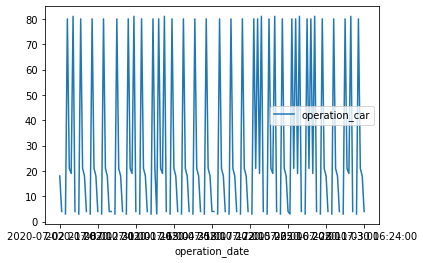

In [346]:
df_st_train[['operation_date','operation_car']].drop_duplicates().plot(x='operation_date', y='operation_car')

In [375]:
df.operation_car.value_counts()

4.00     828782
80.00    695232
3.00     597659
81.00    343248
18.00    284385
21.00    259882
10.00    242559
11.00    105395
19.00     96998
20.00     51427
26.00     45153
78.00     42649
79.00     36346
28.00     16617
16.00       929
27.00       597
13.00       428
29.00       344
14.00         3
23.00         1
Name: operation_car, dtype: int64

In [378]:
cds[cds.index_code == 27]

,index_code,mnem_code,description
26,27,ВЫГ8,ПЕРЕГРУЗ НА УЗКУЮ КОЛЕЮ
